<a href="https://colab.research.google.com/github/MagnumOpusSirius/ML-Model-Project/blob/main/RandomForestHandson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/wine_fraud.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.duplicated().sum()

np.int64(1177)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   object 
 12  type                  5320 non-null   object 
dtypes: float64(11), object(2)
memory usage: 581.9+ KB


In [ ]:
#RandomForest are multiple Decision Tree so they are robust to outliers

# Check for outliers:
# Loop over each numeric column
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

fixed acidity: 304 outliers
volatile acidity: 279 outliers
citric acid: 143 outliers
residual sugar: 141 outliers
chlorides: 237 outliers
free sulfur dioxide: 44 outliers
total sulfur dioxide: 10 outliers
density: 3 outliers
pH: 49 outliers
sulphates: 163 outliers
alcohol: 1 outliers


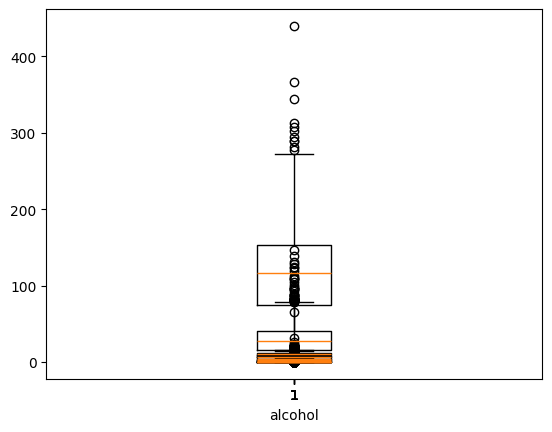

In [ ]:
for x in df.columns:
    if df[x].dtype=='object':
        continue

    plt.boxplot(df[x])
    plt.xlabel(x)

In [ ]:
# Convert our quality col and type col into numerical cols so apply label encoding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['quality'] = le.fit_transform(df['quality'])
df['type'] = le.fit_transform(df['type'])

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,1


In [ ]:
li = []
for x in df.columns:
  if x=='quality':
    continue
  li.append(x)




In [ ]:
X = df[li]
y = df['quality']

In [ ]:
X = df.drop(columns=['quality'])  #Another approach.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 34)
x_train.shape

(4256, 12)

In [ ]:
x_test.shape

(1064, 12)

In [ ]:
y_test.shape

(1064,)

In [ ]:
y_train.shape

(4256,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report

# 3. Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

# 4. Predict & evaluate
y_pred = rf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9539473684210527


In [ ]:
df['quality'].value_counts()

,count
quality,
1,5084
0,236


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.04      0.08        49
           1       0.96      1.00      0.98      1015

    accuracy                           0.95      1064
   macro avg       0.73      0.52      0.53      1064
weighted avg       0.93      0.95      0.93      1064



In [ ]:
result = pd.DataFrame(columns = ['Actual Values', 'Predicted Values'])
result['Actual Velues'] = y_test
result['Predicted Velues'] = y_pred

result

,Actual Values,Predicted Values,Actual Velues,Predicted Velues
6068,NaN,NaN,1,1
5838,NaN,NaN,1,1
991,NaN,NaN,1,1
1370,NaN,NaN,1,1
5834,NaN,NaN,1,1
...,...,...,...,...
5869,NaN,NaN,1,1
1224,NaN,NaN,1,1
151,NaN,NaN,0,1
5813,NaN,NaN,1,1


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(x_train, y_train)

print("Best params:", grid_search.best_params_)

Best params: {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 100}
